In [1]:
#importing some libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
data = pd.read_csv("D:\Data science\SCMS_Delivery_History_Dataset.csv",encoding = "latin1")

In [4]:
data.head()

,ï»¿Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,CÃ´te d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,CÃ´te d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [5]:
data.shape

(7879, 32)

In [6]:
data.columns

Index(['ï»¿Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [7]:
print("Total number of rows: " ,data.shape[0] )
print("Total number of columns: " ,data.shape[1] )

Total number of rows:  7879
Total number of columns:  32


In [8]:
data = data.drop(["Item Description","Molecule/Test Type"],axis=1) 

In [10]:
data = data[data["Weight (Kilograms)"]!="Weight Captured Separately"] 

In [11]:
data = data[data["Freight Cost (USD)"]!="Freight Included in Commodity Cost"] 

In [12]:
data = data[data["Freight Cost (USD)"]!="Invoiced Separately"] 

In [13]:
data.shape

(6175, 30)

In [14]:
data.dtypes

ï»¿Project Code                  object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64
Line Item Value                 float64
Pack Price                      float64
Unit Price                      float64


In [15]:
data["Weight (Kilograms)"] =pd.to_numeric(data["Weight (Kilograms)"])

In [16]:
data["Freight Cost (USD)"] =pd.to_numeric(data["Freight Cost (USD)"])

In [17]:
data["Scheduled Delivery Date"] = pd.to_datetime(data["Scheduled Delivery Date"])

In [21]:
order=data["PO / SO #"].nunique() #5572 orders

In [22]:
order=data["PO / SO #"].count() #6175 orders

In [24]:
total_projects = data["ï»¿Project Code"].nunique() #130

In [28]:
total_Freight_Cost= data["Freight Cost (USD)"].sum() #68687760.27

In [29]:
avg_Freight_Cost= total_Freight_Cost/order #12327.308016870064

In [30]:
country_summary = data.groupby("Country").sum().reset_index()

In [31]:
data.head()

,ï»¿Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,CÃ´te d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.50,NaN
2,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,CÃ´te d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [32]:
country_summary.columns

Index(['Country', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Weight (Kilograms)',
       'Freight Cost (USD)', 'Line Item Insurance (USD)'],
      dtype='object')

In [33]:
country_summary = country_summary[["Country","Freight Cost (USD)"]]

In [36]:
country_summary = data.groupby(["Country","Shipment Mode"]).sum().reset_index()

In [37]:
country_summary = country_summary[["Country","Shipment Mode","Freight Cost (USD)"]]

In [38]:
country_summary = data.groupby(["Country","Shipment Mode"]).agg({"PO / SO #":"count","Freight Cost (USD)":"sum"}).reset_index()

In [39]:
country_summary["frt_cst_shipment_per_country_usd_order"] = country_summary["Freight Cost (USD)"]/country_summary["PO / SO #"]

In [40]:
country_summary.head()

,Country,Shipment Mode,PO / SO #,Freight Cost (USD),frt_cst_shipment_per_country_usd_order
0,Afghanistan,Air,2,1081.05,540.525000
1,Angola,Air,5,30832.07,6166.414000
2,Angola,Truck,2,1964.63,982.315000
3,Benin,Air,7,66015.17,9430.738571
4,Botswana,Air,58,133841.79,2307.617069


In [79]:
plt.figure(figsize = (30,7))

<Figure size 2160x504 with 0 Axes>

<Figure size 2160x504 with 0 Axes>

In [82]:
sns.set(font_scale=0.8, palette = "dark")

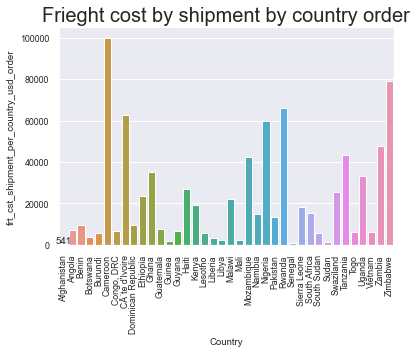

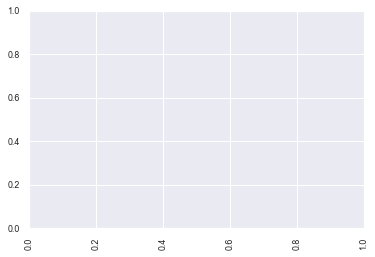

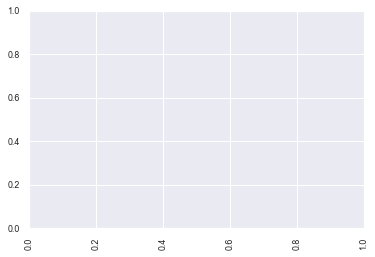

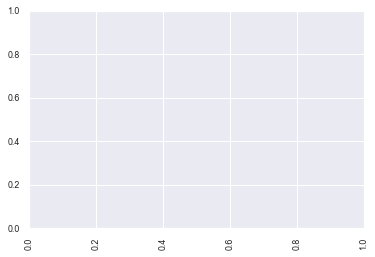

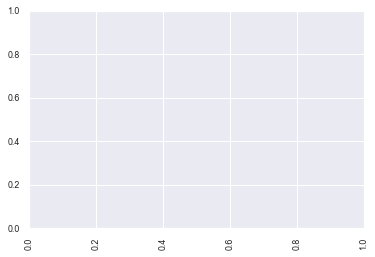

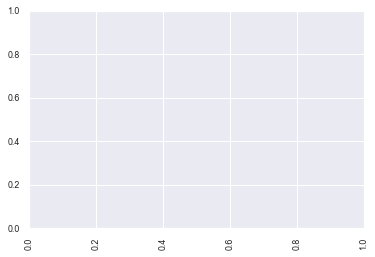

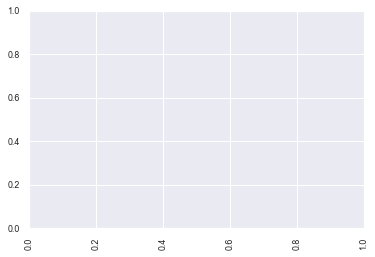

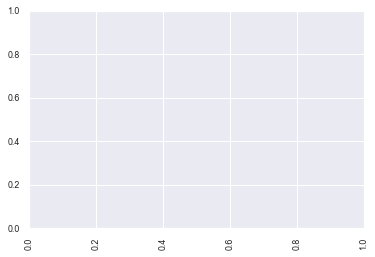

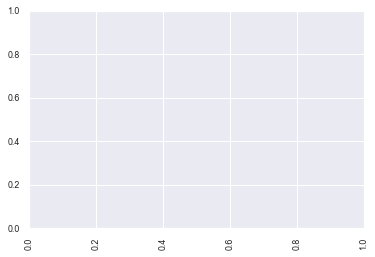

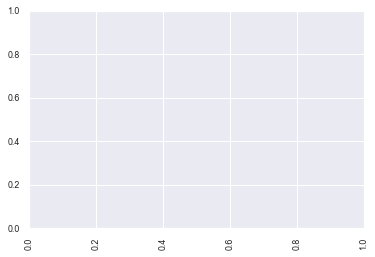

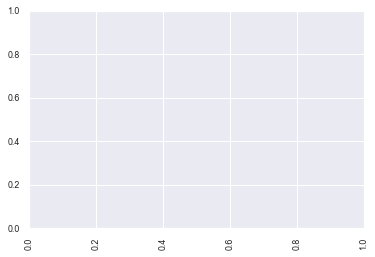

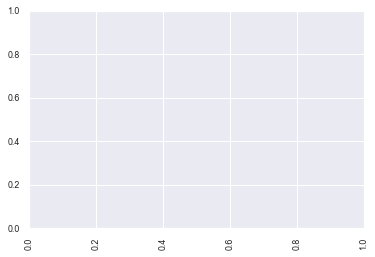

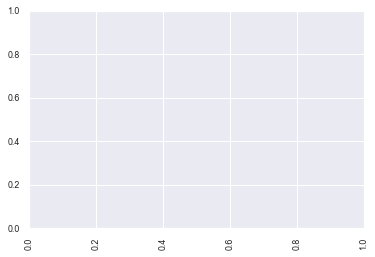

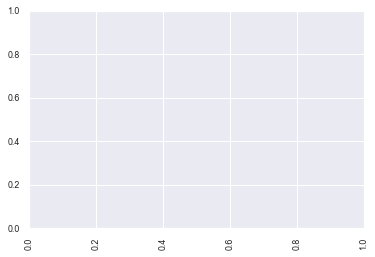

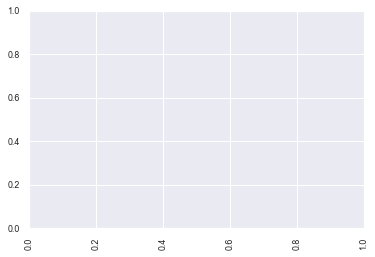

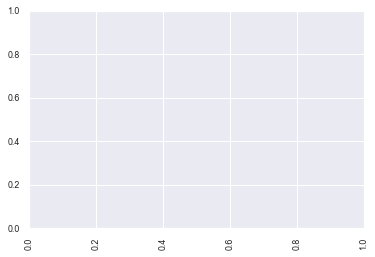

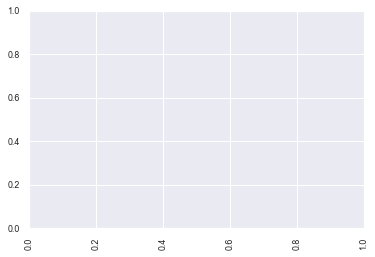

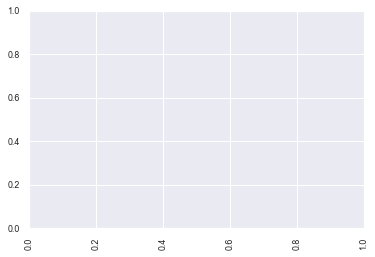

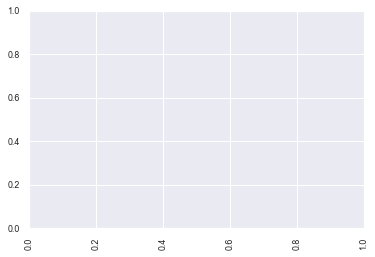

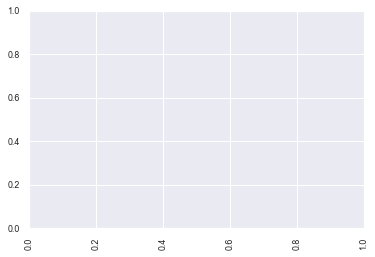

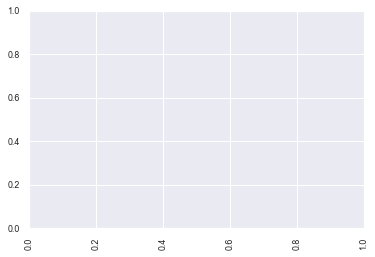

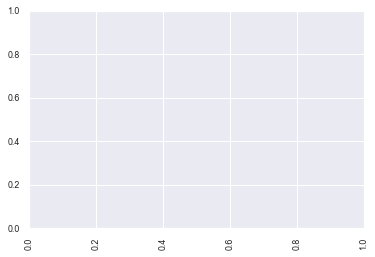

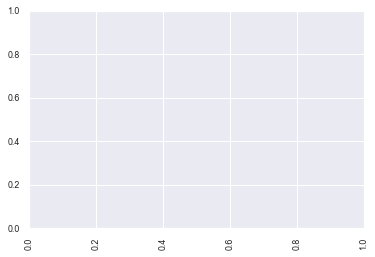

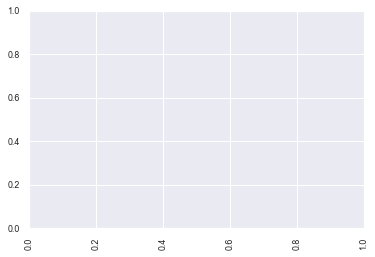

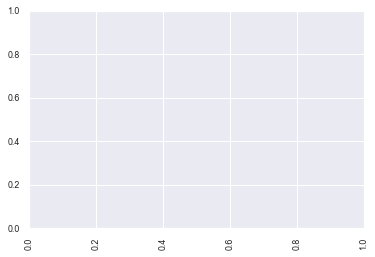

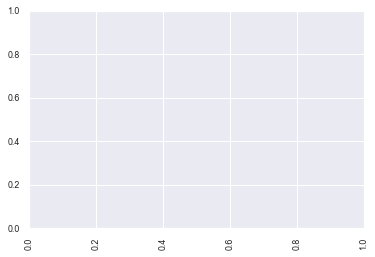

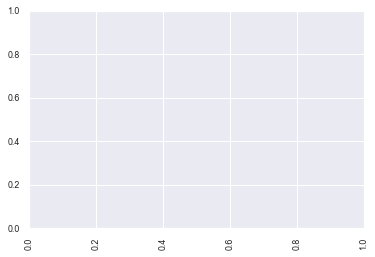

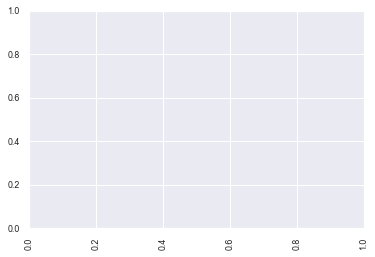

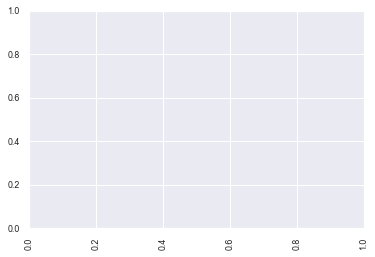

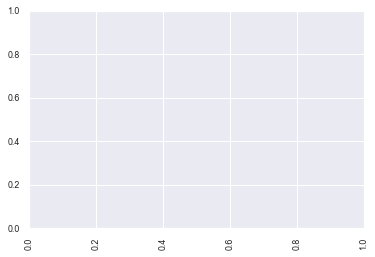

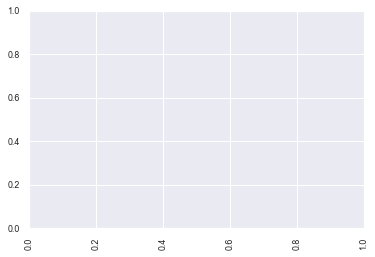

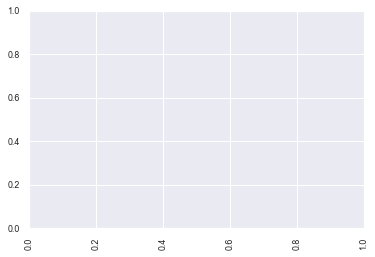

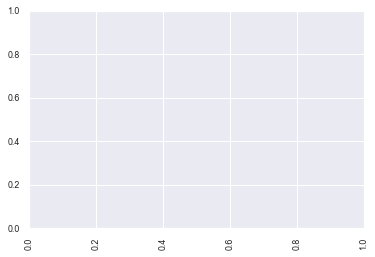

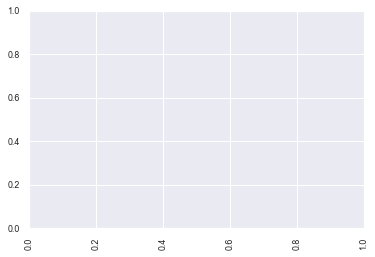

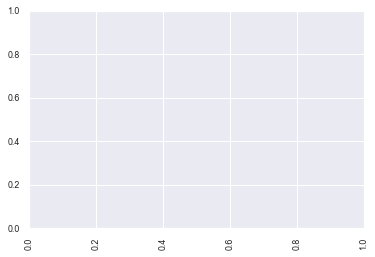

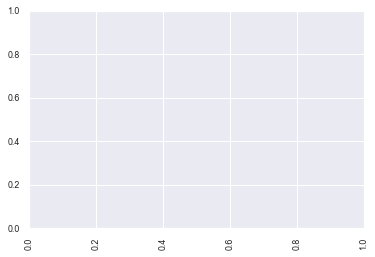

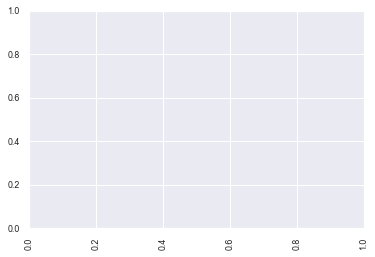

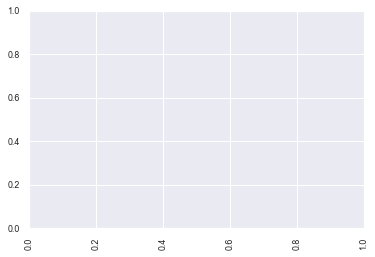

In [83]:
ax = sns.barplot(data=country_summary, x = "Country", y="frt_cst_shipment_per_country_usd_order" , ci = None, estimator = sum )
plt.title("Frieght cost by shipment by country order", fontsize = 20)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+10, ha="center", s="{:.0f}".format(height))
    plt.xticks(rotation ="vertical")
    plt.show()

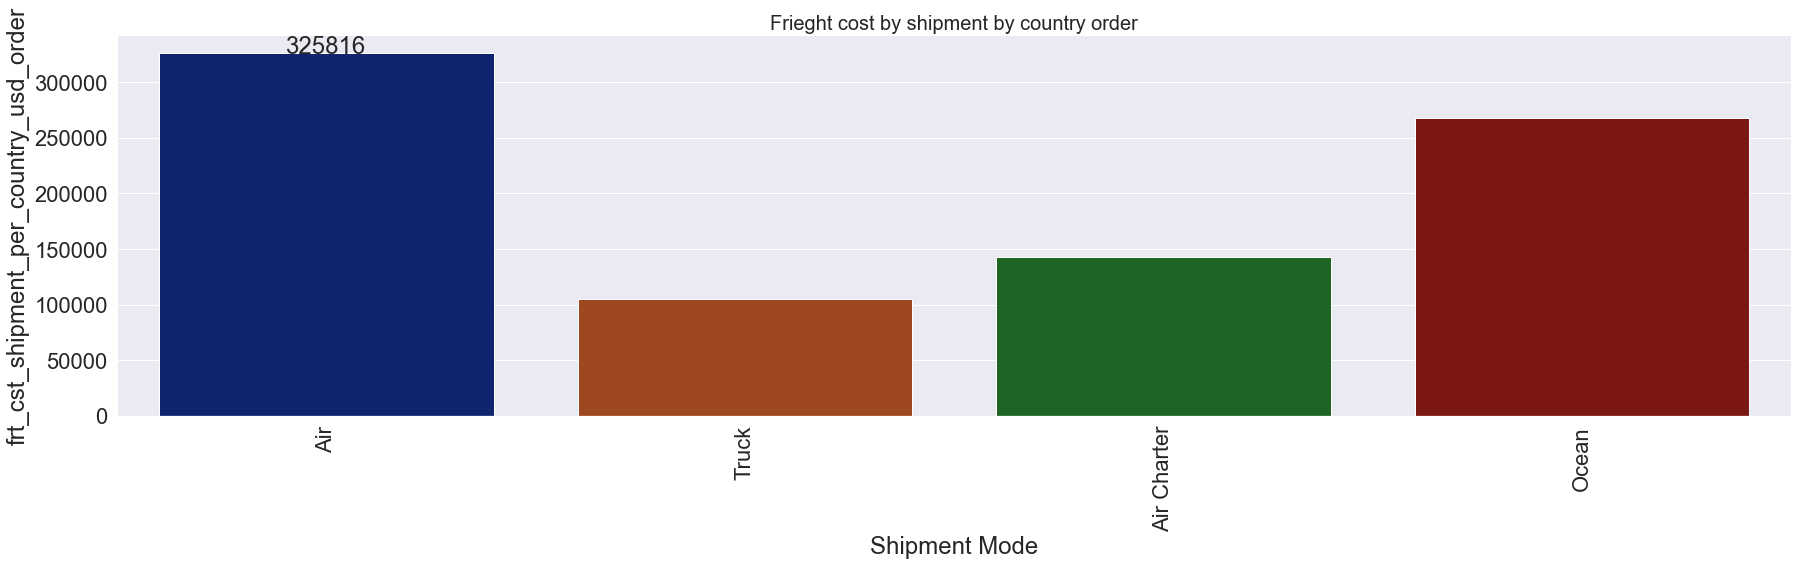

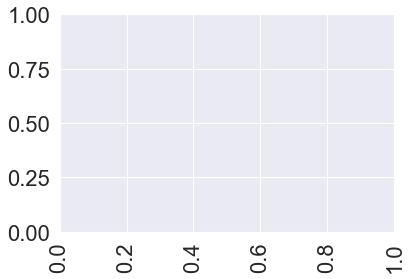

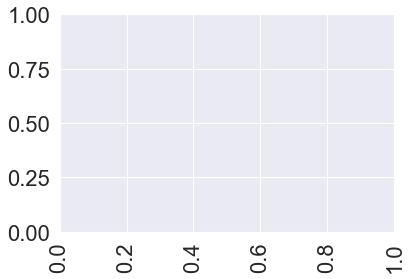

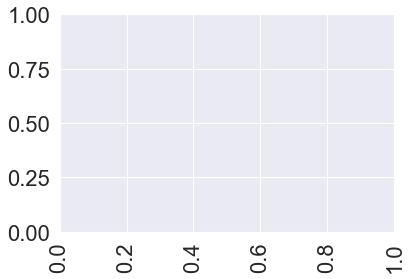

In [86]:
plt.figure(figsize = (30,7))
sns.set(font_scale=2, palette = "dark")
ax = sns.barplot(data=country_summary, x = "Shipment Mode", y="frt_cst_shipment_per_country_usd_order" , ci = None, estimator = sum )
plt.title("Frieght cost by shipment by country order", fontsize = 20)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+10, ha="center", s="{:.0f}".format(height))
    plt.xticks(rotation ="vertical")
    plt.show()

In [87]:
#total freight cost for top 10 country
totalfreight= data.groupby(["Country"])["Freight Cost (USD)"].sum().nlargest(10)

In [88]:
totalfreight.head()

Country
Nigeria           14227197.64
Zambia             6309186.49
CÃ´te d'Ivoire     6092165.51
Rwanda             5890687.72
Uganda             5484292.24
Name: Freight Cost (USD), dtype: float64

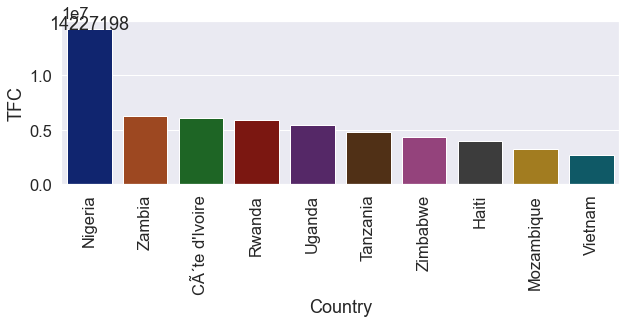

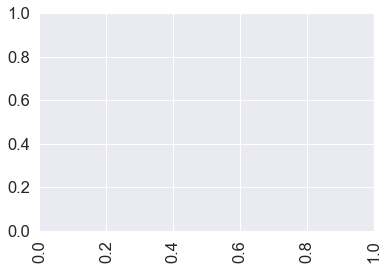

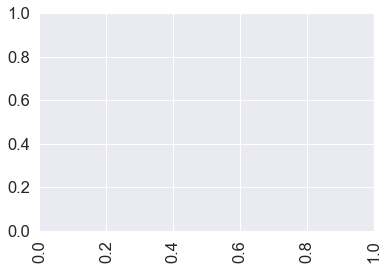

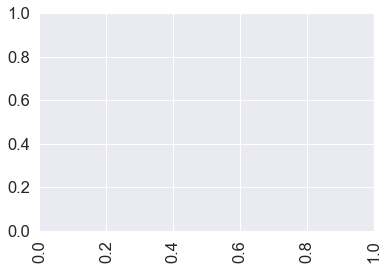

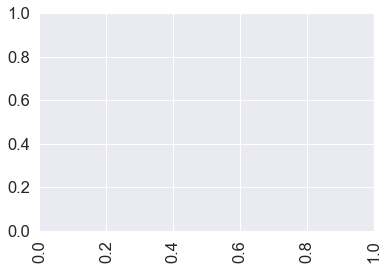

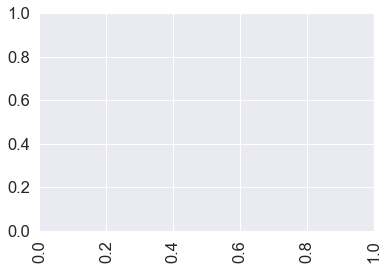

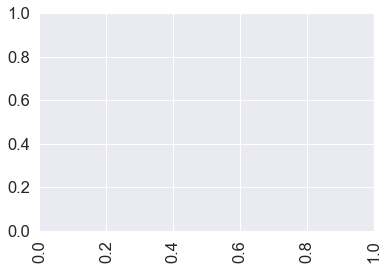

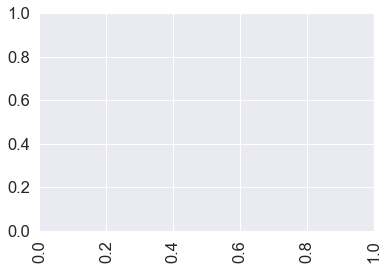

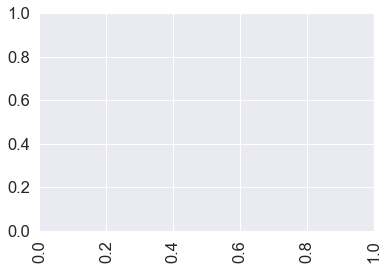

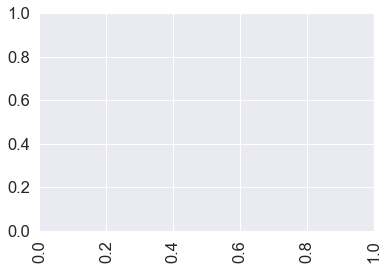

In [101]:
plt.figure(figsize = (10,3))
ax_1=data.groupby(["Country"])["Freight Cost (USD)"].sum().nlargest(10).reset_index()
ax = sns.barplot(data=ax_1, x = "Country", y="Freight Cost (USD)" , ci = None, estimator = sum )
plt.ylabel("TFC")

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+10, ha="center", s="{:.0f}".format(height))
    plt.xticks(rotation ="vertical")
    plt.show()

In [92]:
# mf is manufacturing
mf_summary = data.groupby("Manufacturing Site").count().reset_index()
mf_summary.head()

,Manufacturing Site,ï»¿Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,ABBVIE (Abbott) France,6,6,6,6,6,6,6,6,3,...,6,6,6,6,6,6,6,6,6,5
1,ABBVIE (Abbott) Logis. UK,125,125,125,125,125,125,125,125,121,...,125,125,125,125,125,125,125,125,125,124
2,ABBVIE (Abbott) St. P'burg USA,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
3,ABBVIE GmbH & Co.KG Wiesbaden,34,34,34,34,34,34,34,34,27,...,34,34,34,34,34,34,34,34,34,15
4,ABBVIE Ludwigshafen Germany,277,277,277,277,277,277,277,277,267,...,277,277,277,277,277,277,277,277,277,274


In [93]:
mf_summary = data.groupby(["Manufacturing Site"]).agg({"PO / SO #":"count","Freight Cost (USD)":"sum"}).reset_index()
mf_summary.head()

,Manufacturing Site,PO / SO #,Freight Cost (USD)
0,ABBVIE (Abbott) France,6,29262.03
1,ABBVIE (Abbott) Logis. UK,125,938805.39
2,ABBVIE (Abbott) St. P'burg USA,2,7952.82
3,ABBVIE GmbH & Co.KG Wiesbaden,34,119679.70
4,ABBVIE Ludwigshafen Germany,277,1773632.59


C:\Users\puja_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\puja_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


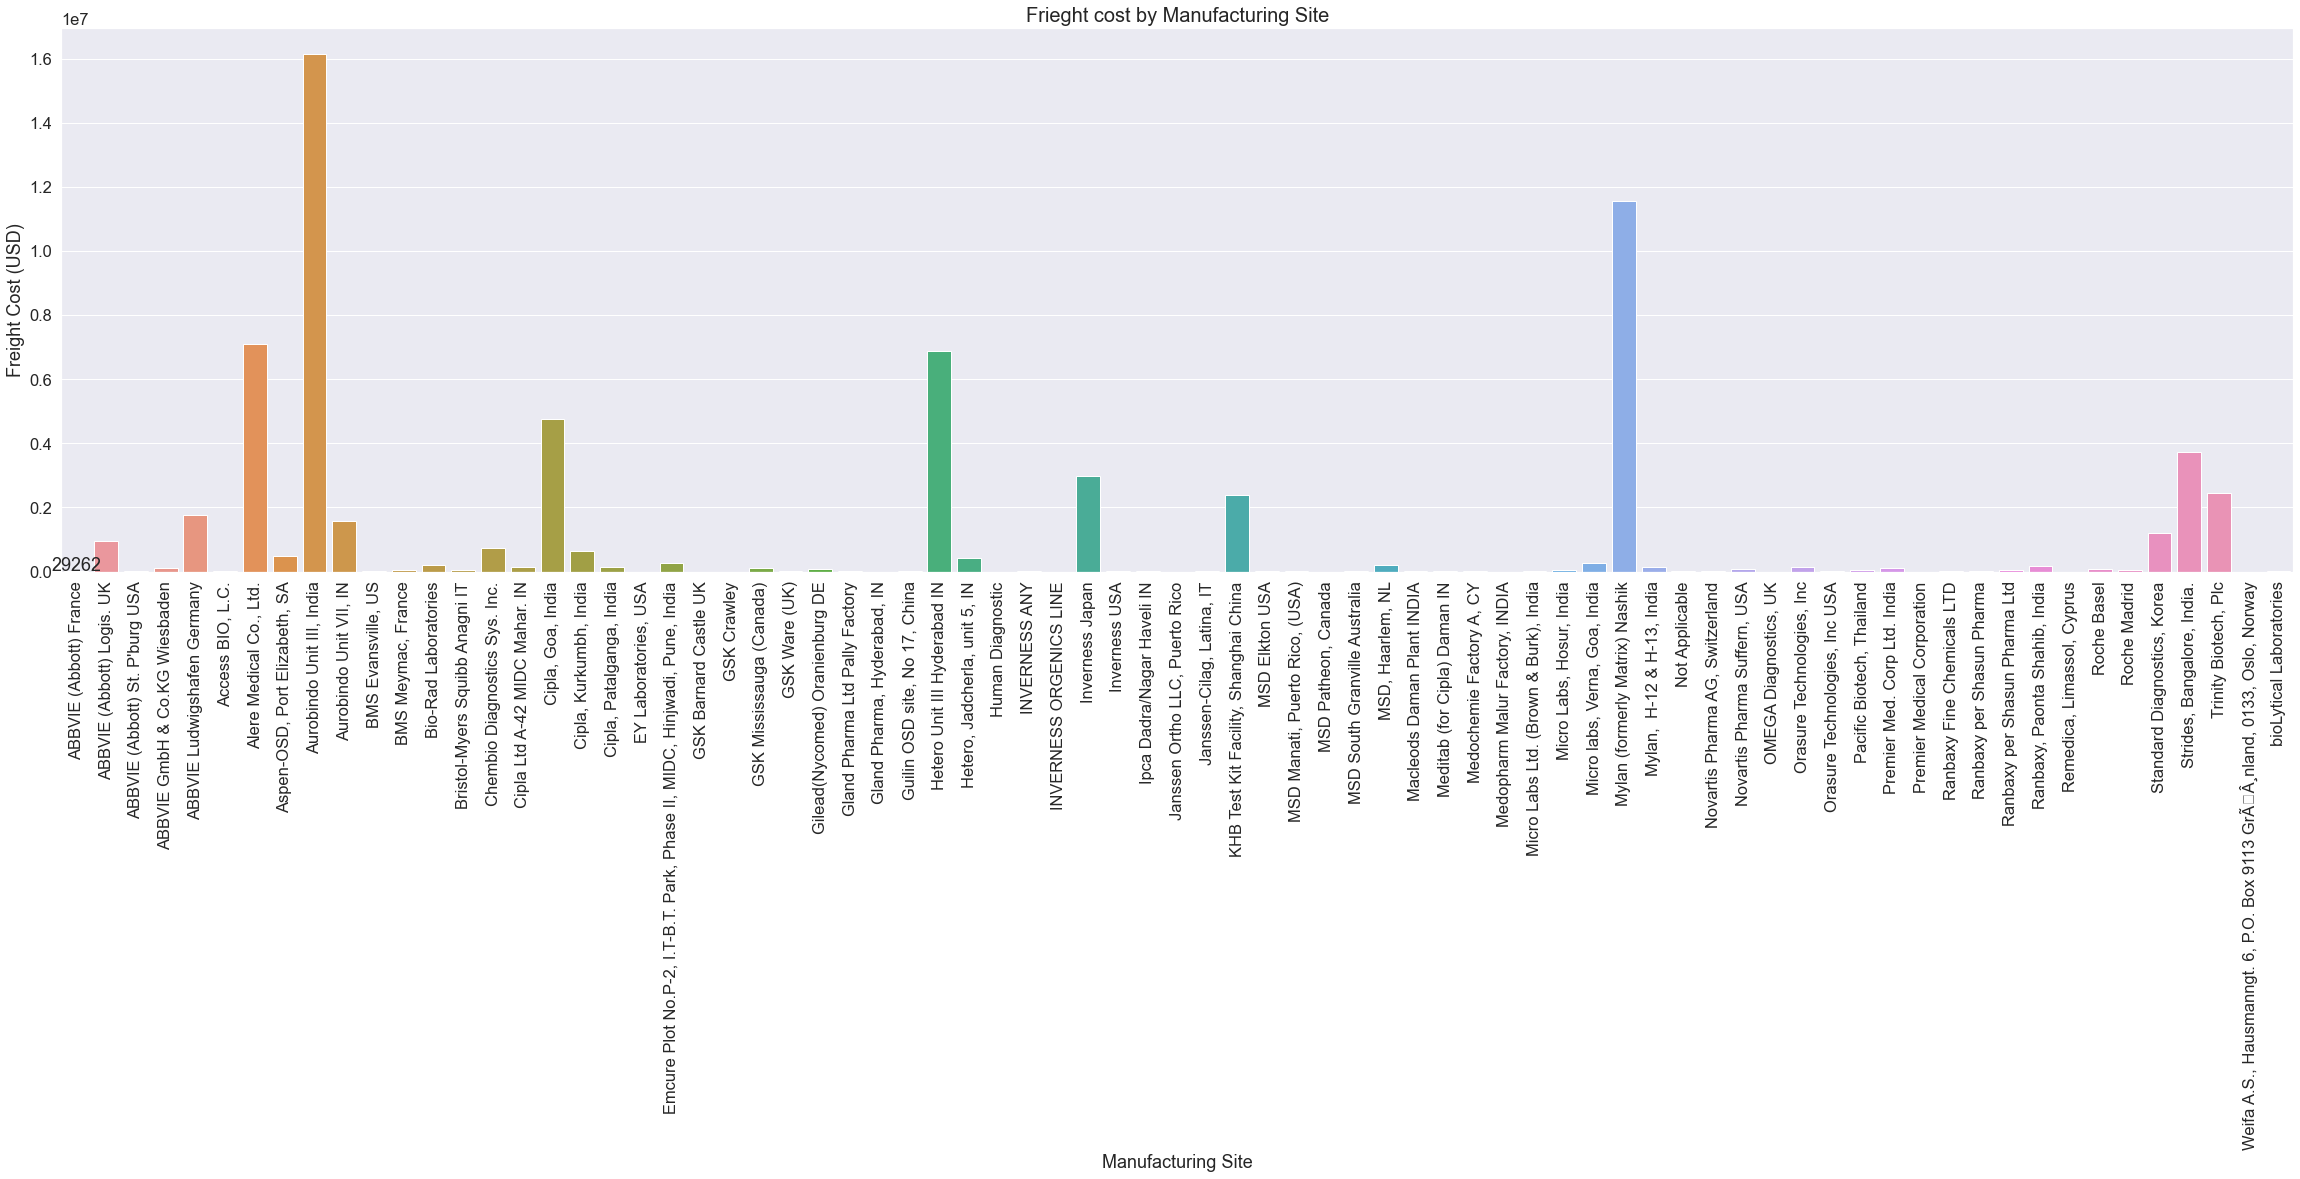

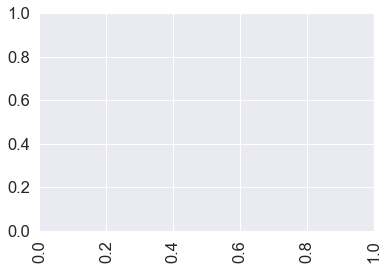

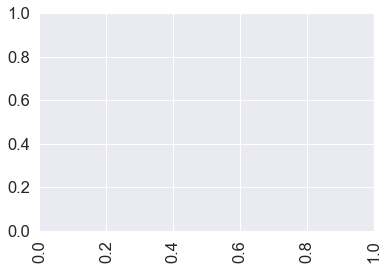

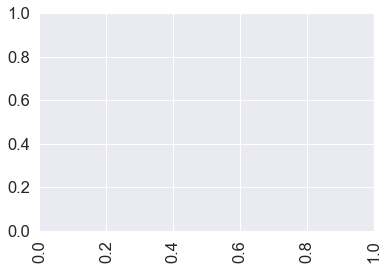

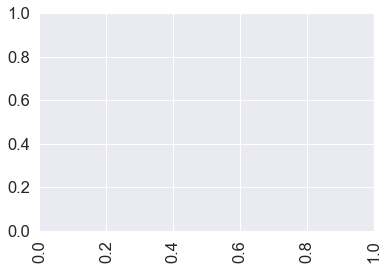

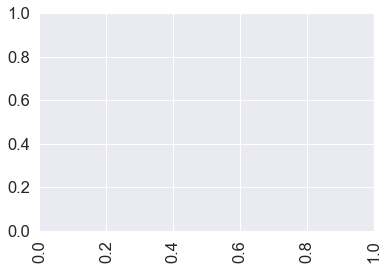

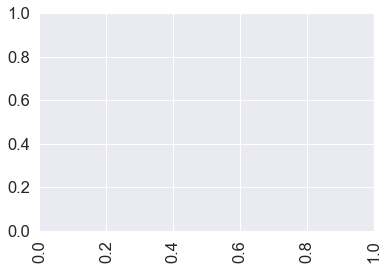

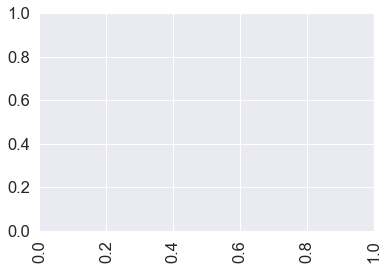

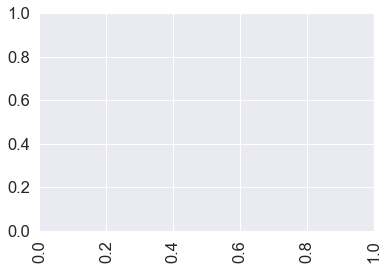

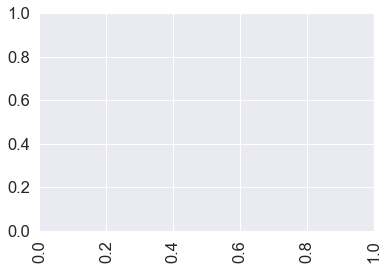

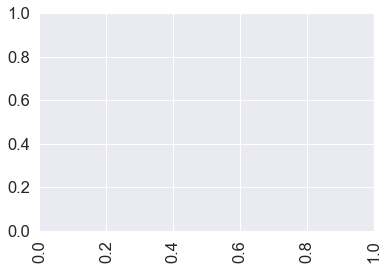

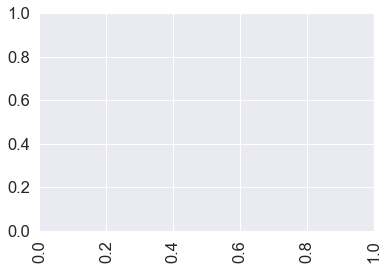

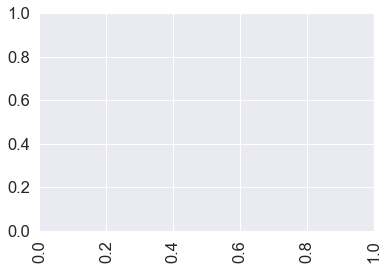

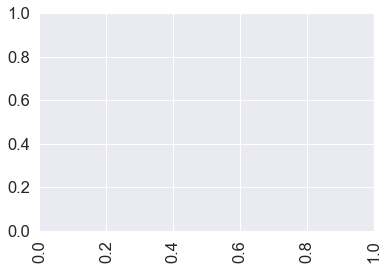

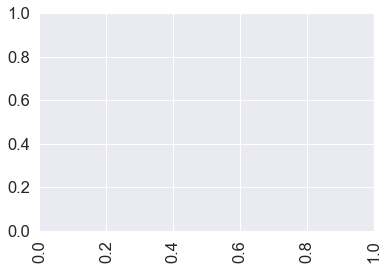

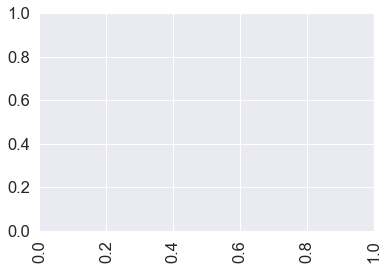

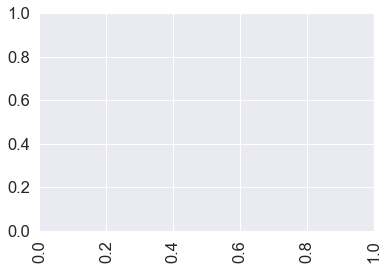

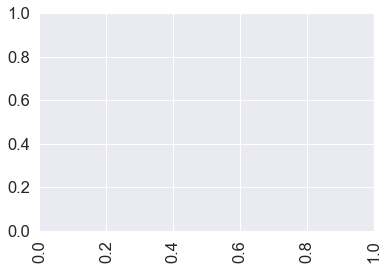

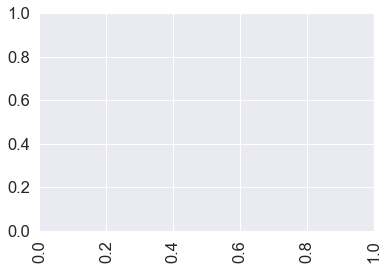

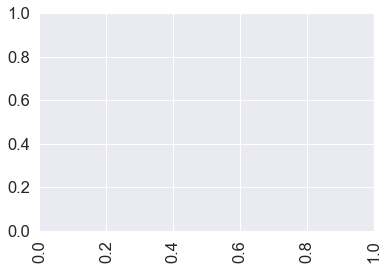

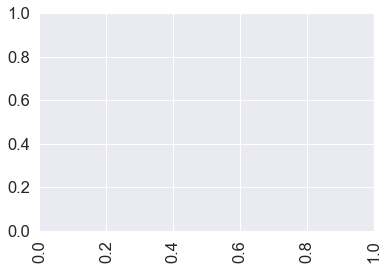

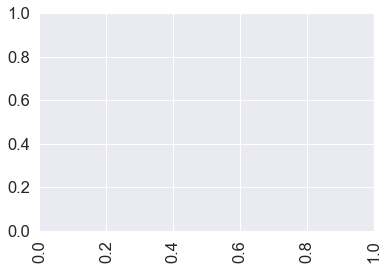

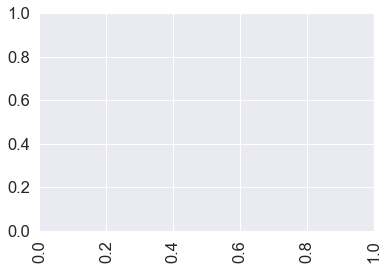

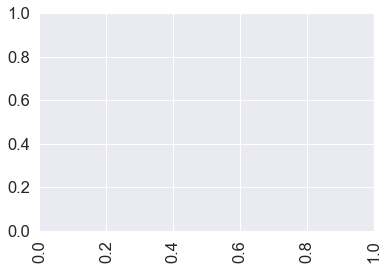

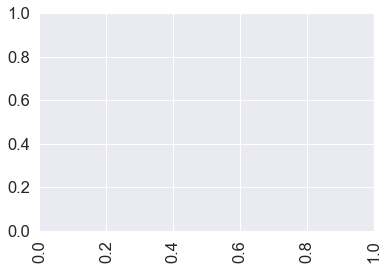

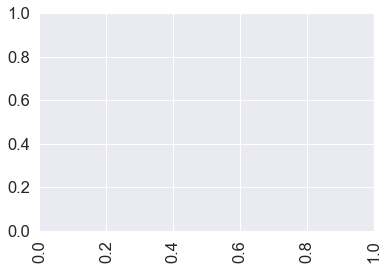

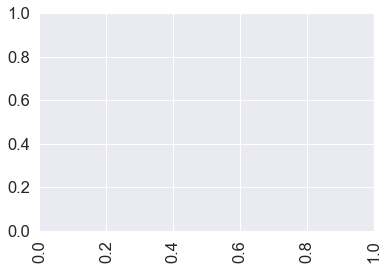

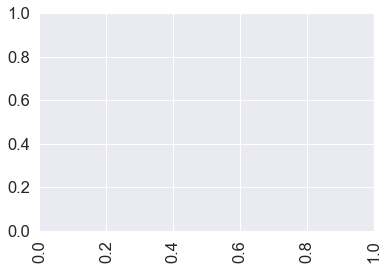

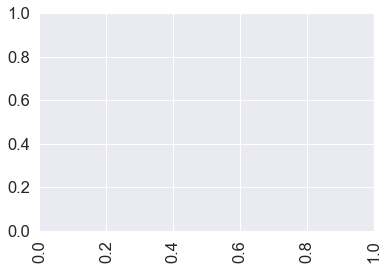

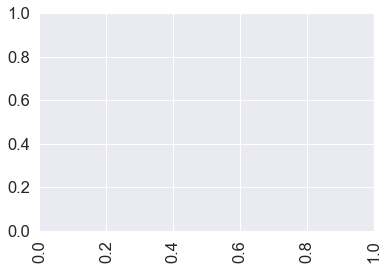

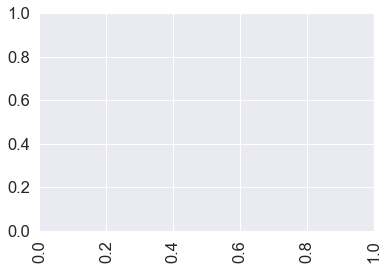

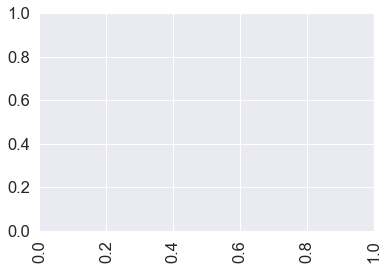

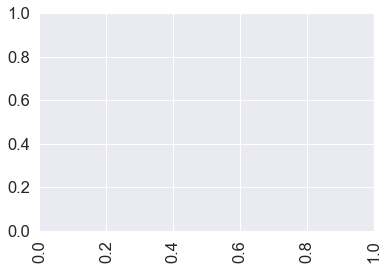

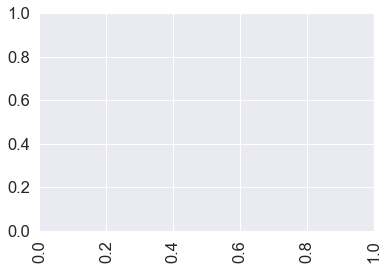

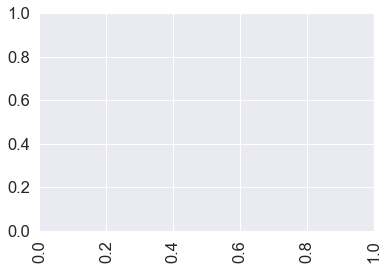

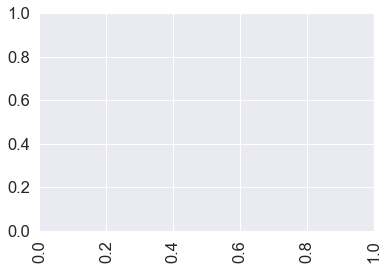

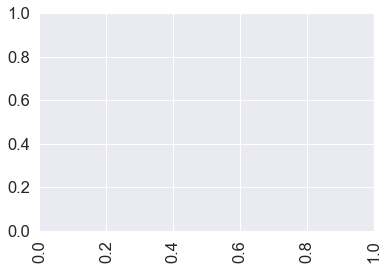

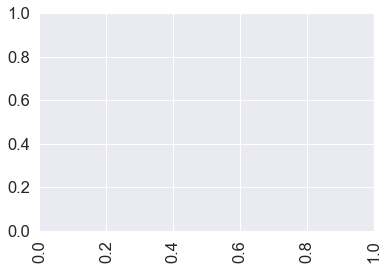

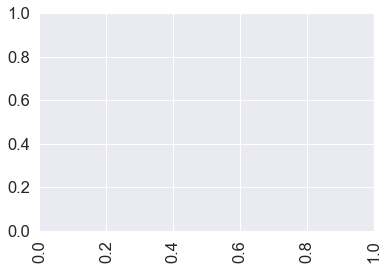

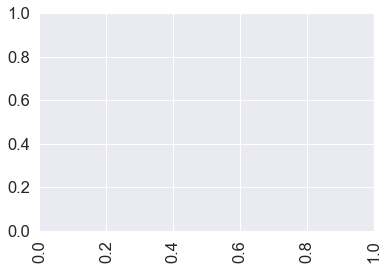

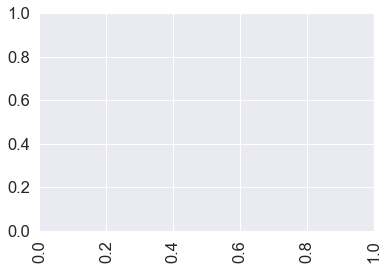

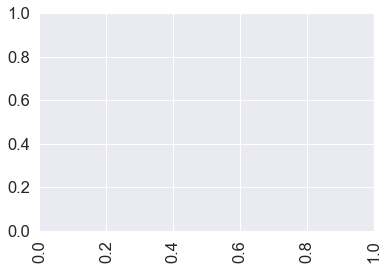

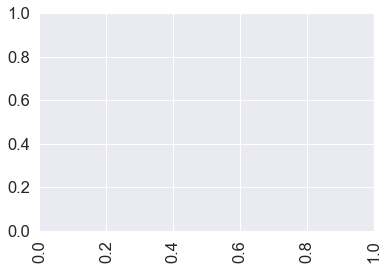

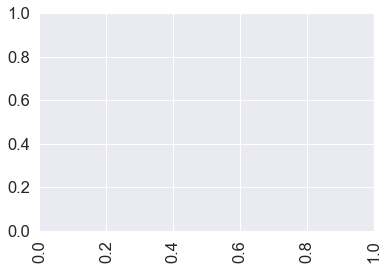

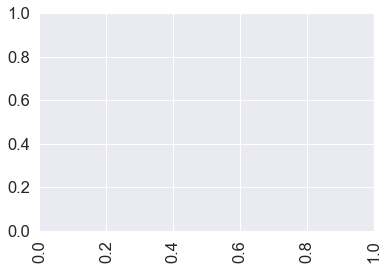

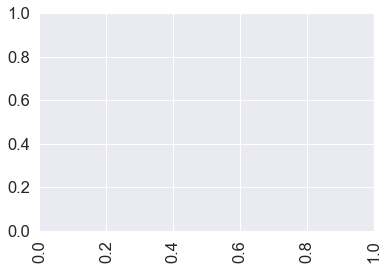

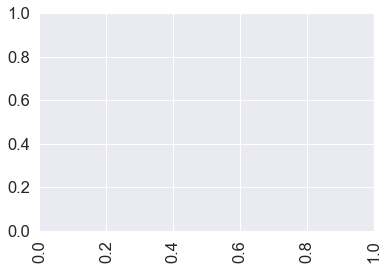

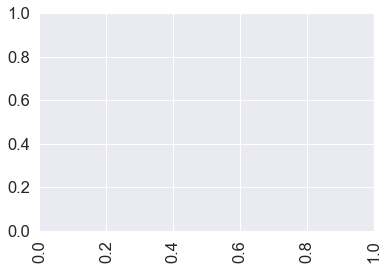

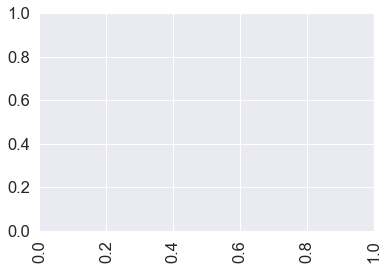

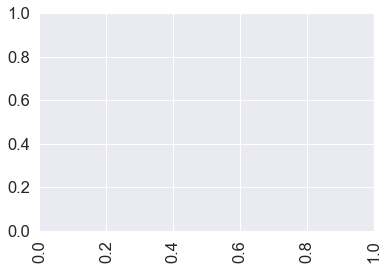

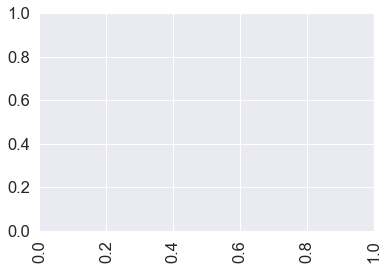

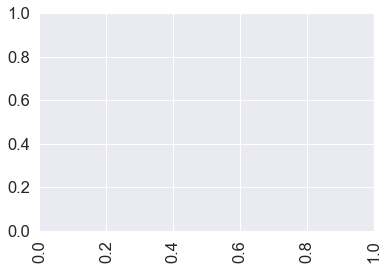

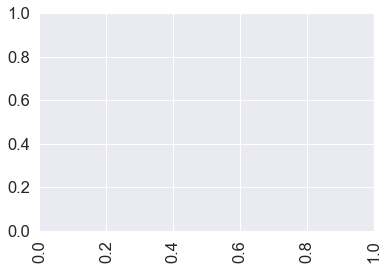

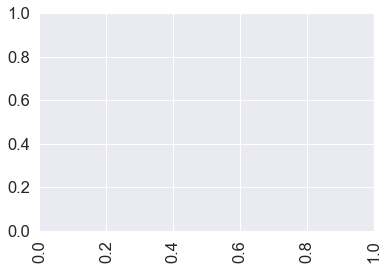

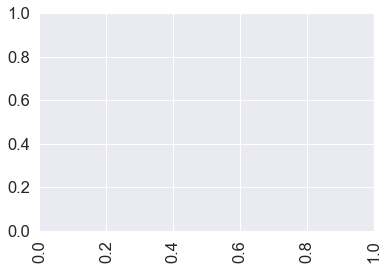

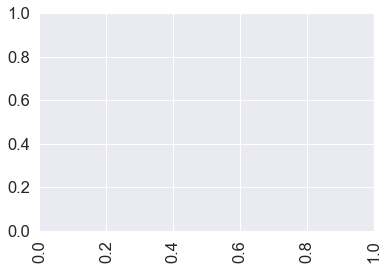

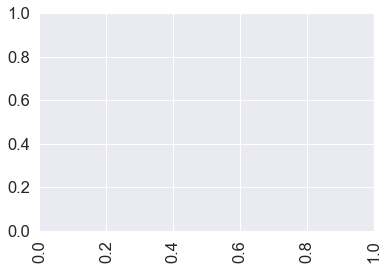

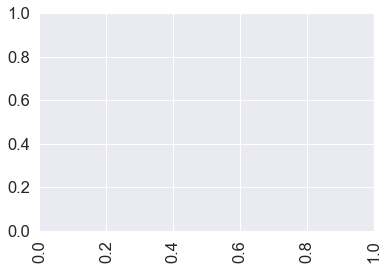

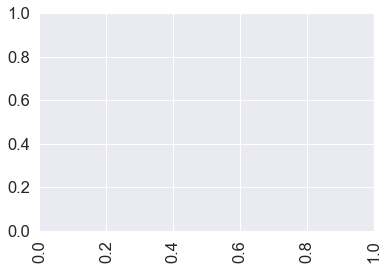

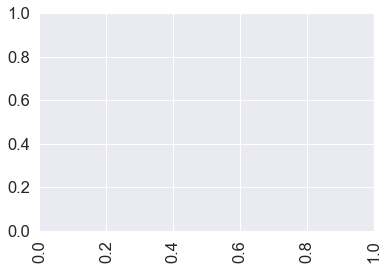

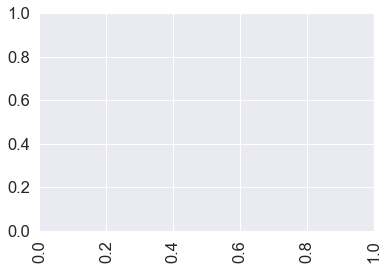

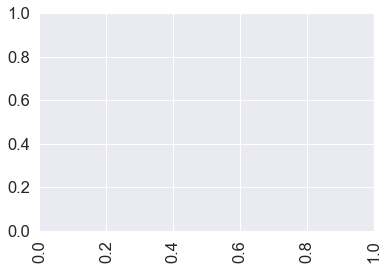

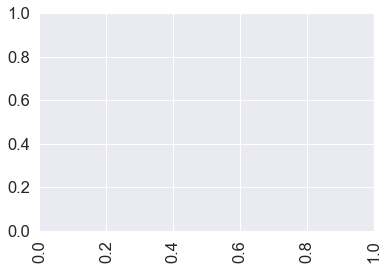

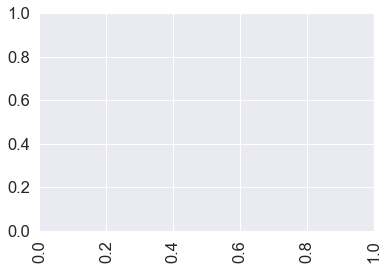

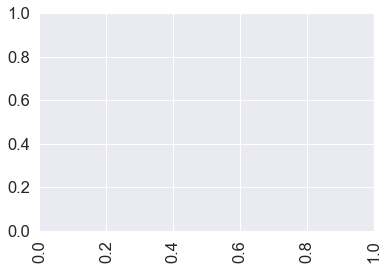

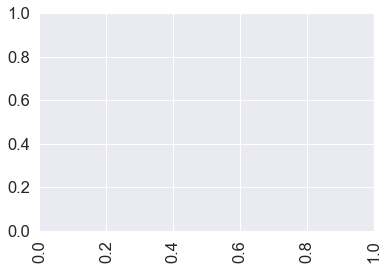

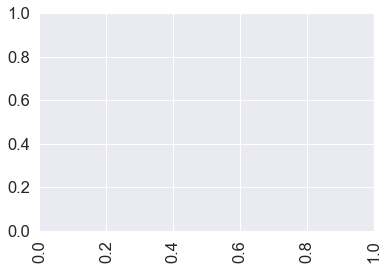

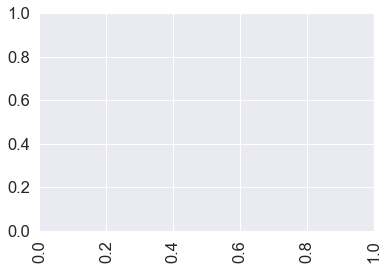

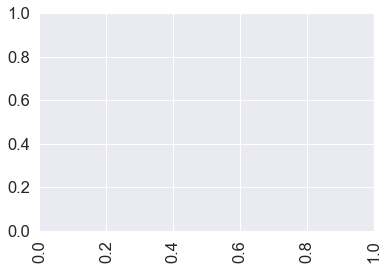

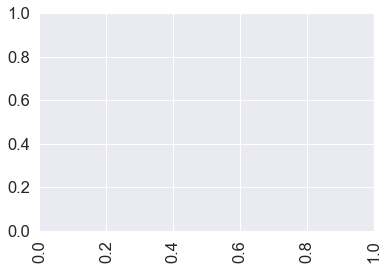

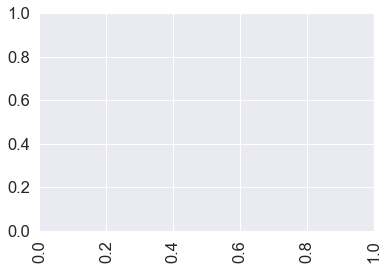

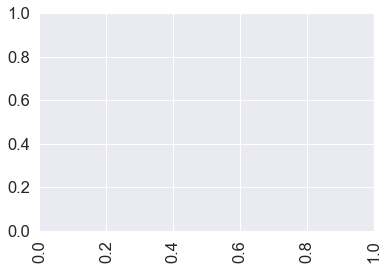

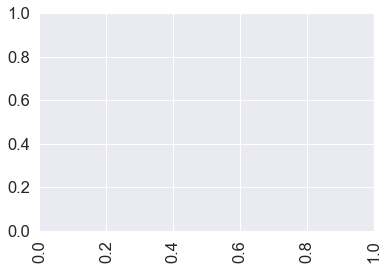

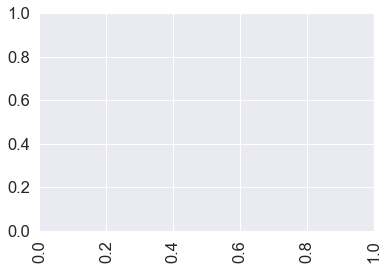

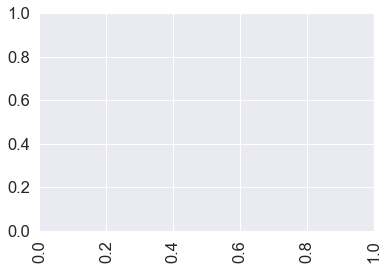

In [95]:
plt.figure(figsize = (40,10))
sns.set(font_scale=1.5, palette = "dark")

ax = sns.barplot(data=mf_summary, x = "Manufacturing Site", y="Freight Cost (USD)" , ci = None, estimator = sum )
plt.title("Frieght cost by Manufacturing Site", fontsize = 20)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+10, ha="center", s="{:.0f}".format(height))
    plt.xticks(rotation ="vertical")
    plt.show()

In [98]:
#total freight cost for top 10 country
total_freight= data.groupby(["Manufacturing Site"])["Freight Cost (USD)"].sum().nlargest(10)
total_freight.head()

Manufacturing Site
Aurobindo Unit III, India         16158534.80
Mylan (formerly Matrix) Nashik    11568067.44
Alere Medical Co., Ltd.            7109931.22
Hetero Unit III Hyderabad IN       6898490.39
Cipla, Goa, India                  4754497.47
Name: Freight Cost (USD), dtype: float64